# Changing working Directory

In [ ]:
import os
os.chdir('D:\\DOCUMENTS\\WAHYLAB\\project')

# IMPORT LIBRARIES

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,SnowballStemmer
from nltk.corpus import stopwords
#stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SpatialDropout1D,LSTM,Embedding,Flatten,Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


# IMPORT DATASET

In [ ]:
df= pd.read_csv("amazon_alexa.tsv",sep='\t')

# EDA AND PREPROCESSING

In [ ]:
df1=df.copy()

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.shape

(3150, 5)

In [ ]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [ ]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

### we have no null values

In [ ]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [ ]:
for i in df.columns:
  print(i,df[i].unique())

rating [5 4 3 2 1]
date ['31-Jul-18' '30-Jul-18' '29-Jul-18' '28-Jul-18' '27-Jul-18' '26-Jul-18'
 '25-Jul-18' '24-Jul-18' '23-Jul-18' '22-Jul-18' '21-Jul-18' '20-Jul-18'
 '19-Jul-18' '18-Jul-18' '17-Jul-18' '16-Jul-18' '15-Jul-18' '14-Jul-18'
 '13-Jul-18' '12-Jul-18' '11-Jul-18' '10-Jul-18' '9-Jul-18' '8-Jul-18'
 '7-Jul-18' '6-Jul-18' '5-Jul-18' '4-Jul-18' '3-Jul-18' '2-Jul-18'
 '1-Jul-18' '30-Jun-18' '29-Jun-18' '28-Jun-18' '27-Jun-18' '26-Jun-18'
 '25-Jun-18' '24-Jun-18' '23-Jun-18' '22-Jun-18' '21-Jun-18' '20-Jun-18'
 '19-Jun-18' '18-Jun-18' '17-Jun-18' '16-Jun-18' '15-Jun-18' '14-Jun-18'
 '13-Jun-18' '12-Jun-18' '11-Jun-18' '10-Jun-18' '9-Jun-18' '8-Jun-18'
 '7-Jun-18' '6-Jun-18' '5-Jun-18' '4-Jun-18' '3-Jun-18' '2-Jun-18'
 '1-Jun-18' '31-May-18' '30-May-18' '29-May-18' '28-May-18' '27-May-18'
 '26-May-18' '25-May-18' '24-May-18' '23-May-18' '22-May-18' '21-May-18'
 '20-May-18' '19-May-18' '18-May-18' '17-May-18' '16-May-18']
variation ['Charcoal Fabric ' 'Walnut Finish ' 'Heather 

In [ ]:
for i in df.columns:
  print('\n',i,'\n',df[i].value_counts())


 rating 
 5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

 date 
 30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
9-Jun-18        1
29-May-18       1
4-Jun-18        1
13-Jun-18       1
Name: date, Length: 77, dtype: int64

 variation 
 Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

 verified_reviews 
                            

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<AxesSubplot:xlabel='rating', ylabel='count'>

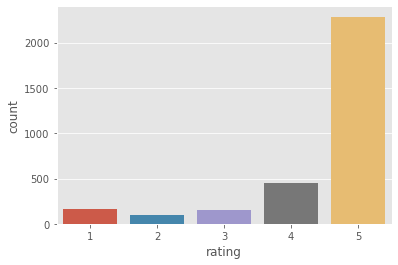

In [ ]:
sns.countplot(x='rating',data=df)

### About 2286  of the peoples rated 5

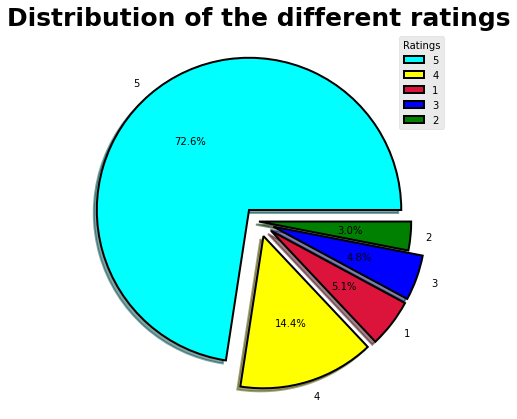

In [ ]:
fig=plt.figure(figsize=(7,7))
colors=("cyan","yellow","crimson","blue","green")
wp={'linewidth':2,'edgecolor':"black"}
explode=(0.1,0.1,0.1,0.1,0
        )
tags=df['rating'].value_counts()
tags.plot(kind='pie',autopct="%1.1f%%",label='',colors=colors,explode=explode,shadow=True,wedgeprops=wp)
plt.legend(title="Ratings")
plt.title('Distribution of the different ratings',fontsize='25',fontweight='bold')
plt.show()


# Distribution of Different products

<AxesSubplot:xlabel='count', ylabel='variation'>

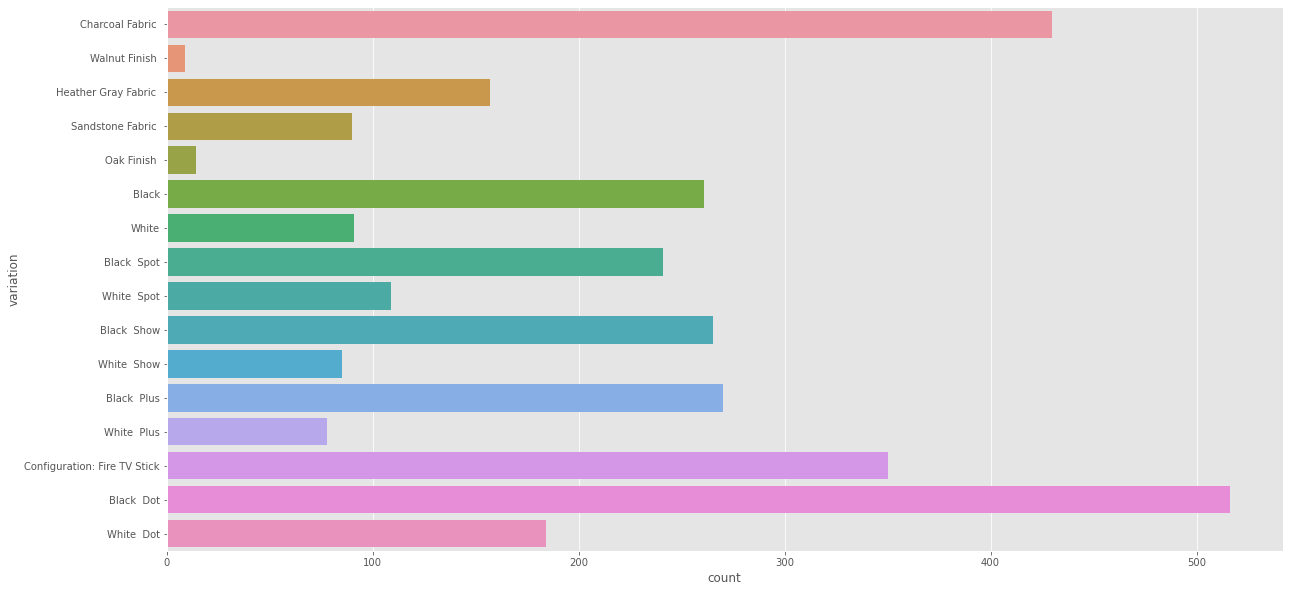

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.countplot(y='variation',data=df)

### Blackdot is most commonly used product by the customer.About 516 of the customers use this product .They also give reviews to this product

<AxesSubplot:xlabel='feedback', ylabel='count'>

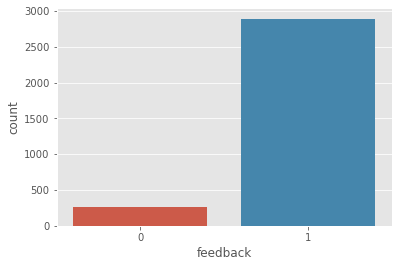

In [ ]:
sns.countplot('feedback',data=df)

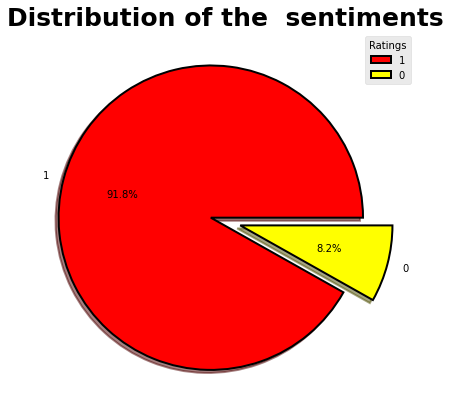

In [ ]:
fig=plt.figure(figsize=(7,7))
colors=("red","yellow")
wp={'linewidth':2,'edgecolor':"black"}
explode=(0.1,0.1)
tags=df['feedback'].value_counts()
tags.plot(kind='pie',autopct="%0.1f%%",label='',colors=colors,explode=explode,shadow=True,wedgeprops=wp)
plt.legend(title="Ratings")
plt.title('Distribution of the  sentiments',fontsize='25',fontweight='bold')
plt.show()

### positive comments are more

In [ ]:
for i in range(5):
    print(df["verified_reviews"].iloc[i],"\n")
    print(df["feedback"].iloc[i],"\n")

Love my Echo! 

1 

Loved it! 

1 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

1 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

1 

Music 

1 



In [ ]:
df.shape

(3150, 5)

In [ ]:
def check_smileys(text):
  smiley_regex = r"(?:X|:|;|=)(?:-)?(?:\)|\(|O|D|P)"
  return len(re.findall(smiley_regex, text)) > 0

# Add a new column to the dataset indicating if there are smileys in the review
df["has_smileys"] = df["verified_reviews"].apply(check_smileys)

# Print the first 5 rows of the updated dataset
smiley_reviews = df[df['has_smileys'] == True]
print(smiley_reviews.head())



     rating       date          variation  \
19        4  30-Jul-18  Sandstone Fabric    
248       3  29-Jul-18   Charcoal Fabric    
379       5  26-Jul-18              White   
571       5  11-Jun-18              Black   
602       4   5-Jun-18              Black   

                                      verified_reviews  feedback  has_smileys  
19   I liked the original Echo. This is the same bu...         1         True  
248  I bought this to replace a &#34;Dot&#34; in my...         1         True  
379      LOVE LOVE LOVE my new and free assistant!  :)         1         True  
571  I took a chance on a certified refurbished uni...         1         True  
602  This is a great device. We mainly use it to ve...         1         True  


In [ ]:
# Choose the column to check for contractions
column = "verified_reviews"
contraction_reviews=[]

# Loop over elements of the column
for i, row in df.iterrows():
    if "'" in row[column]:
         contraction_review=f"Contraction found in row {i}: {row[column]}"
         contraction_reviews.append(contraction_review)

for contraction_review in contraction_reviews[:5]:
    print(contraction_review)

Contraction found in row 7: I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.
Contraction found in row 11: I love it! Learning knew things with it eveyday! Still figuring out how everything works but so far it's been easy to use and understand. She does make me laugh at times
Contraction found in row 19: I liked the original Echo. This is the same but shorter and with greater fabric/color choices. I miss the volume ring on top, now it's just the plus/minus buttons. Not a big deal but the ring w as comforting. :) Other than that, well I do like the use of a standard USB charger /port instead of the previous round pin. Other than that, I guess it sounds the same, seems to work the same, still answers to Alexa/Echo/Computer. So what's not to like? :)
Contraction found in row 21: We love Alexa! We use her to play music, 

In [ ]:
def expand_contractions(text, contraction_dict):
    words = text.split()
    expanded_words = [contraction_dict.get(word, word) for word in words]
    print(expanded_words)
    return " ".join(expanded_words)

In [ ]:
def expand_reviews(df, contraction_dict):
    df['verified_reviews'] = df['verified_reviews'].apply(lambda x: expand_contractions(x, contraction_dict))
    return df

In [ ]:
contraction_dict = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not",
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "he'd":"he had",
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "so’s":"so is",
    "so’ve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yes’m":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

In [ ]:
df = expand_reviews(df, contraction_dict)

['Love', 'my', 'Echo!']
['Loved', 'it!']
['Sometimes', 'while', 'playing', 'a', 'game,', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'Alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you.', 'I', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home.']
['I', 'have', 'had', 'a', 'lot', 'of', 'fun', 'with', 'this', 'thing.', 'My', '4', 'yr', 'old', 'learns', 'about', 'dinosaurs,', 'i', 'control', 'the', 'lights', 'and', 'play', 'games', 'like', 'categories.', 'Has', 'nice', 'sound', 'when', 'playing', 'music', 'as', 'well.']
['Music']
['I', 'received', 'the', 'echo', 'as', 'a', 'gift.', 'I', 'needed', 'another', 'Bluetooth', 'or', 'something', 'to', 'play', 'music', 'easily', 'accessible,', 'and', 'found', 'this', 'smart', 'speaker.', 'Can’t', 'wait', 'to', 'see', 'what', 'else', 'it', 'can', 'do.']
['Without', 'having', 'a', 'cellphone,', 'I', 'cannot', 'use', 'many', 'of', 'her', 'features

In [ ]:
import emoji
UNICODE_EMOJI = {'👍🏻': 'Thumbs Up', '😂': 'Face with Tears of Joy', '👍':'Thumbs Up' , '😍': 'Smiling_Face_With_Heart-Shaped Eyes', '😁😁😁😁': 'Beaming Face with Smiling Eyes', '👍🏾': 'Thumbs Up', '😬':'Grimacing Face ', '😍💋💋💋💋❤': 'Smiling Face_With Heart-Shaped Eyes_Kiss Marks_red heart',
                 '😉': 'Winking Face','😊': 'positive feelings', '🎶':'music', '😔':'remorseful face', '😑': 'Expressionless', '😎': ' cool', '😳': ' Flushed', '❤️❤️': 'heart', '⭐⭐⭐⭐⭐': 'five_star', '❤': 'heart', '😥':'Disappointed but Relieved Face','😏': 'Smirk Emoji', '😄😄':'grinning face with smiling eyes' }
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, ' '+"_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split())+' ')
    return text

# Function for converting emoticons into word
EMOTICONS_EMO = {':)':'Happy or smiling face', ':-)':'Happy or smiling face',';)':'Winking face',';-)':'Winking face', ':(':'Sad face', ':-(':'Sad face', ':-D':'Grinning face with a big smile', ':D':'Grinning face with a big smile'}
def convert_emoticons(text):
    for i,v in EMOTICONS_EMO.items():
        if i in text:
            text = text.replace(i,"_".join(v.replace(",","").split()))
            break
    return text

In [ ]:
df["verified_reviews_clean"]=df["verified_reviews"].apply(convert_emojis)
df["verified_reviews_clean"]=df["verified_reviews_clean"].apply(convert_emoticons)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords


In [ ]:
for i in range(0, 3150):
    df["verified"] = re.sub('[^a-zA-Z]', ' ', df["verified_reviews_clean"][i])

In [ ]:
def clean(text):
    text=text.lower()
    text=re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[-()\"#/@;:<>~|.?,!]","",text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    tokens = word_tokenize(text)
    print(tokens)
    stop_words = set(stopwords.words("english"))
    words = [w for w in tokens if not w in stop_words]
    return " ".join(words)
#Convert the text to lowercase
#Remove anything in square brackets using a regular expression pattern match
#Remove all punctuation from the text using another regular expression pattern match
#Remove any words containing digits using yet another regular expression pattern match
#Remove certain characters such as hyphens, brackets, and quotes using a regular expression pattern match
#Remove newline characters
#Remove non-ASCII characters

In [ ]:
# Print the first 5 rows of the updated dataset
df[df['has_smileys'] == True]
print('All smilies are removed')

All smilies are removed


In [ ]:
df["verified_reviews_clean"]=df["verified_reviews_clean"].apply(clean)

['love', 'my', 'echo']
['loved', 'it']
['sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', 'i', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home']
['i', 'have', 'had', 'a', 'lot', 'of', 'fun', 'with', 'this', 'thing', 'my', 'yr', 'old', 'learns', 'about', 'dinosaurs', 'i', 'control', 'the', 'lights', 'and', 'play', 'games', 'like', 'categories', 'has', 'nice', 'sound', 'when', 'playing', 'music', 'as', 'well']
['music']
['i', 'received', 'the', 'echo', 'as', 'a', 'gift', 'i', 'needed', 'another', 'bluetooth', 'or', 'something', 'to', 'play', 'music', 'easily', 'accessible', 'and', 'found', 'this', 'smart', 'speaker', 'can', 't', 'wait', 'to', 'see', 'what', 'else', 'it', 'can', 'do']
['without', 'having', 'a', 'cellphone', 'i', 'can', 'not', 'use', 'many', 'of', 'her', 'features', 'i', 'hav

In [ ]:
#stemmer=SnowballStemmer(language='english')
#def stemming(data):
    #text=[stemmer.stem(word) for word in data]
   # return data
#return [stemmer.stem(word) for word in data]

In [ ]:
#df["verified_reviews"]=df["verified_reviews"].apply(lambda x:stemming(x))
#df["verified_reviews"]

In [ ]:
for i in range(5):
    print(df['verified_reviews_clean'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

love echo 

1 

loved 

1 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

1 

lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well 

1 

music 

1 



In [ ]:
for i in range(200,241):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

A great device 

1 

I owned an echo for overa year but the new lacks the easy way to increase or decrease volume without telling it to increase or decrease volume which is hard to do for my wife since English is her second language she was born in korea. But the sound from the echo is superb. So we’ll keep it.. 

1 

Love this! Have it in the kitchen and works well! 

1 

Very nice! I am impressed - wish she had more to say though. 

1 

Love the product. Nice to have easy access to so much info!!! 

1 

It's got great sound and bass but it does not work all of the time. Its still hot or miss when it recognizes things 

0 

We are still discovering all that the Echo can do. 

1 

Amazing paroduct 

1 

Good hearing range and sound quality. It was a bit complicated to set up and she does not quite understand me a lot even when I am speaking slowly and clearly but I love the flash briefing feature and interfacing with my abode home security system. 

1 

speaker sounds good 

1 

Absolu

In [ ]:
pos_reviews=df[df.feedback==1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback,has_smileys,verified_reviews_clean,verified
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,False,love echo,Good
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,False,loved,Good
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,False,sometimes playing game answer question correct...,Good
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,False,lot fun thing yr old learns dinosaurs control ...,Good
4,5,31-Jul-18,Charcoal Fabric,Music,1,False,music,Good


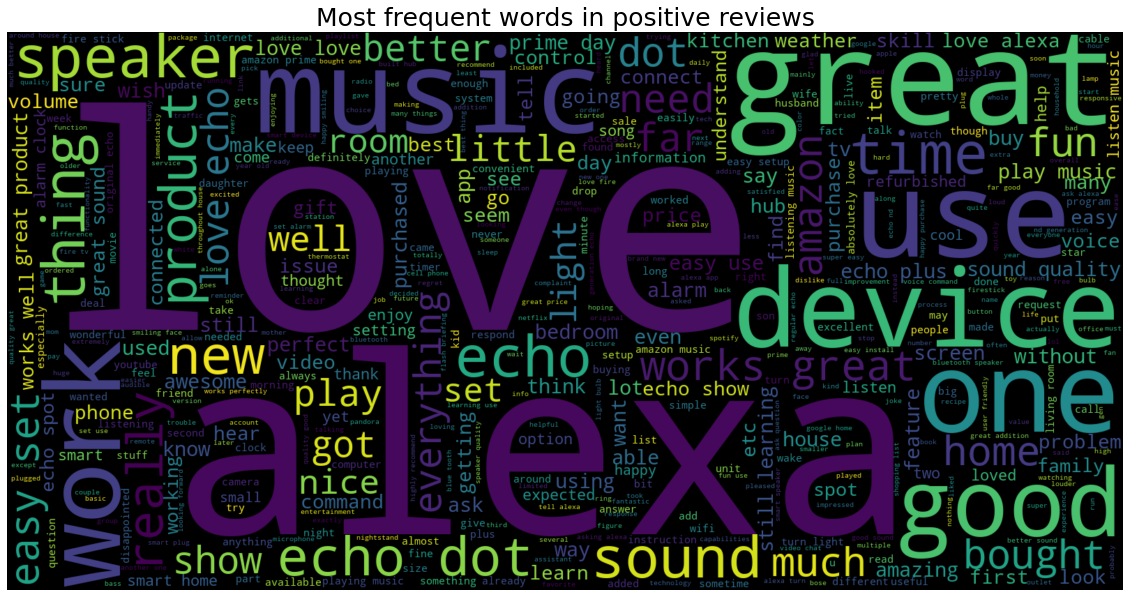

In [ ]:
text=' '.join([word for word in pos_reviews['verified_reviews_clean']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()


In [ ]:
neg_reviews=df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback,has_smileys,verified_reviews_clean,verified
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,False,like siri fact siri answers accurately alexa s...,Good
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,False,sound terrible u want good music get bose,Good
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,False,much features,Good
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,False,stopped working weeks follow commands really f...,Good
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,False,sad joke worthless,Good


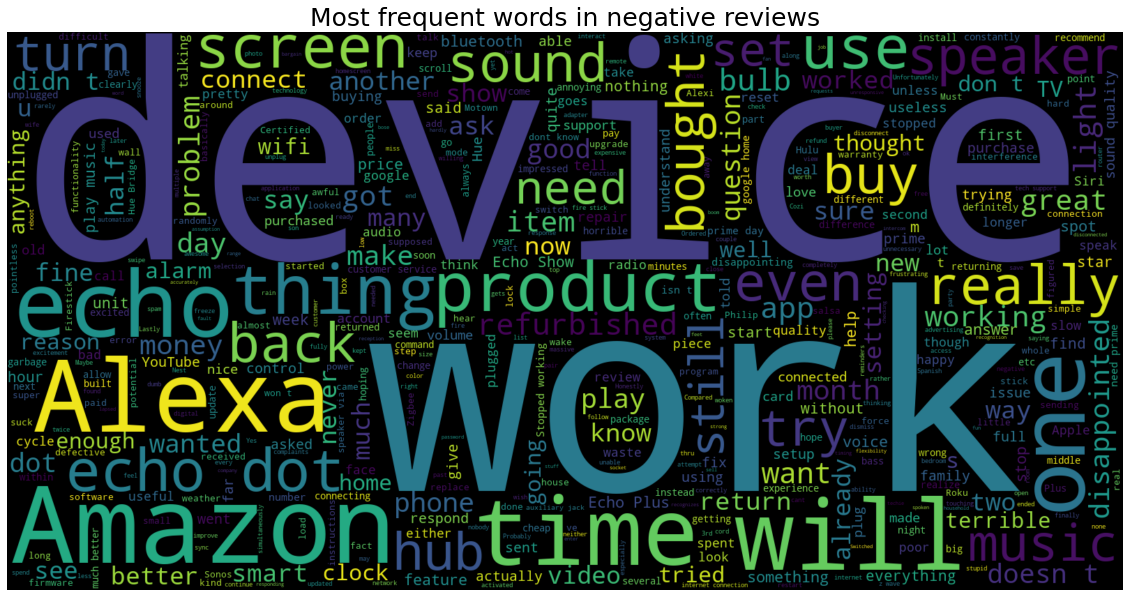

In [ ]:
text=' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize=25)
plt.show()


In [ ]:
df1=df[['verified_reviews','feedback']]

# convert text to binary format

In [ ]:
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(df['verified_reviews_clean'])
print("tokenizer",tokenizer)
X = tokenizer.texts_to_sequences(df['verified_reviews'])
print("X" '/n',X)

tokenizer <keras.preprocessing.text.Tokenizer object at 0x00000234C77EFF70>
X/n [[1, 2], [173], [183, 100, 1664, 230, 468, 633, 4, 288, 42, 469, 381, 6, 58, 68, 62, 253, 20], [89, 35, 45, 1342, 137, 744, 2418, 94, 62, 21, 254, 6, 2419, 66, 11, 100, 5, 34], [5], [367, 2, 138, 277, 79, 120, 141, 21, 5, 245, 1665, 289, 27, 18, 427, 72, 246], [80, 1666, 7, 74, 105, 1155, 72, 7, 3, 52, 498, 1343, 255, 1344, 139, 52, 85, 199, 44, 207, 166, 231, 35, 53, 745, 103, 139, 402, 499, 1667, 1345, 146], [81, 9, 90, 101, 75, 9, 110, 44, 50, 25, 6, 105, 800, 1668, 100, 5, 290, 801, 62, 318, 50], [217, 3], [1, 1669, 167, 428, 168, 1670, 17, 126, 59, 174, 3], [560, 232, 137, 590, 995, 524], [1, 54, 591, 39, 1671, 23, 996, 48, 8, 40, 10, 7, 175, 108, 684, 127], [90, 470, 1672, 179, 266, 141, 187, 200, 75, 144, 267, 6, 802, 56, 188, 39, 4, 21, 233, 24, 685], [1, 1, 1], [121], [1, 208, 1673], [25, 95, 82, 3, 18, 10, 12], [63, 4, 302, 341, 89, 35, 28, 525, 6, 28, 368, 888, 187, 176, 156, 1674, 1346, 200], [1

In [ ]:
tokenizer.word_index

{'love': 1,
 'echo': 2,
 'great': 3,
 'alexa': 4,
 'music': 5,
 'like': 6,
 'use': 7,
 'works': 8,
 'one': 9,
 'easy': 10,
 'sound': 11,
 'set': 12,
 'dot': 13,
 'good': 14,
 'amazon': 15,
 'product': 16,
 'get': 17,
 'speaker': 18,
 'would': 19,
 'home': 20,
 'play': 21,
 'device': 22,
 'still': 23,
 'time': 24,
 'really': 25,
 'bought': 26,
 'smart': 27,
 'new': 28,
 'better': 29,
 'much': 30,
 'prime': 31,
 'also': 32,
 'quality': 33,
 'well': 34,
 'fun': 35,
 'work': 36,
 'day': 37,
 'show': 38,
 'things': 39,
 'far': 40,
 'even': 41,
 'got': 42,
 'devices': 43,
 'room': 44,
 'thing': 45,
 'plus': 46,
 'tv': 47,
 'everything': 48,
 'could': 49,
 'house': 50,
 'screen': 51,
 'alarm': 52,
 'ask': 53,
 'learning': 54,
 'need': 55,
 'little': 56,
 'buy': 57,
 'able': 58,
 'weather': 59,
 'want': 60,
 'spot': 61,
 'lights': 62,
 'using': 63,
 'voice': 64,
 'clock': 65,
 'nice': 66,
 'hub': 67,
 'turn': 68,
 'know': 69,
 'video': 70,
 'used': 71,
 'see': 72,
 'price': 73,
 'many': 74,
 '

num_words is nothing but your vocabulary size. We need to be very cautious while selecting this parameter because this will results in the performace of the model.By default the value of num_words is none. The best value is to use for the num_words is “ len(tokenizer. word_index) + 1"

In [ ]:
index2word={v:k for k,v in  tokenizer.word_index.items()}
index2word

{1: 'love',
 2: 'echo',
 3: 'great',
 4: 'alexa',
 5: 'music',
 6: 'like',
 7: 'use',
 8: 'works',
 9: 'one',
 10: 'easy',
 11: 'sound',
 12: 'set',
 13: 'dot',
 14: 'good',
 15: 'amazon',
 16: 'product',
 17: 'get',
 18: 'speaker',
 19: 'would',
 20: 'home',
 21: 'play',
 22: 'device',
 23: 'still',
 24: 'time',
 25: 'really',
 26: 'bought',
 27: 'smart',
 28: 'new',
 29: 'better',
 30: 'much',
 31: 'prime',
 32: 'also',
 33: 'quality',
 34: 'well',
 35: 'fun',
 36: 'work',
 37: 'day',
 38: 'show',
 39: 'things',
 40: 'far',
 41: 'even',
 42: 'got',
 43: 'devices',
 44: 'room',
 45: 'thing',
 46: 'plus',
 47: 'tv',
 48: 'everything',
 49: 'could',
 50: 'house',
 51: 'screen',
 52: 'alarm',
 53: 'ask',
 54: 'learning',
 55: 'need',
 56: 'little',
 57: 'buy',
 58: 'able',
 59: 'weather',
 60: 'want',
 61: 'spot',
 62: 'lights',
 63: 'using',
 64: 'voice',
 65: 'clock',
 66: 'nice',
 67: 'hub',
 68: 'turn',
 69: 'know',
 70: 'video',
 71: 'used',
 72: 'see',
 73: 'price',
 74: 'many',
 7

In [ ]:
print(len(tokenizer.word_index))
#max_features=3500
maxlen = 45

3872


In [ ]:
vocab_size = len(tokenizer.word_index)+1


In [ ]:
X = pad_sequences(X,padding='post',maxlen=maxlen)
X

array([[   1,    2,    0, ...,    0,    0,    0],
       [ 173,    0,    0, ...,    0,    0,    0],
       [ 183,  100, 1664, ...,    0,    0,    0],
       ...,
       [   1,   39,  565, ...,    0,    0,    0],
       [ 725,   11,   33, ...,    0,    0,    0],
       [  14,    0,    0, ...,    0,    0,    0]])

In [ ]:
X.shape

(3150, 45)

In [ ]:
X[:5]

array([[   1,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [ 173,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [ 183,  100, 1664,  230,  468,  633,    4,  288,   42,  469,  381,
           6,   58,   68,   62,  253,   20,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  89,   35,   45, 1342,  137,  744, 2418,   94,   62,   21,

In [ ]:
y = df['feedback']
Y=y.values
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# TRAIN-TEST SPLIT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40,stratify=Y)

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2520, 45)
Size of y_train:  (2520,)
Size of x_test:  (630, 45)
Size of y_test:  (630,)


# LSTM MODEL BUILDING

#### Model Creation

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length= maxlen,name="embedding"))#embedding_size
model.add(SpatialDropout1D(0.4))
model.add(LSTM(32,dropout=0.3,recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 128)           495744    
                                                                 
 spatial_dropout1d (SpatialD  (None, 45, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                        

#### Configuration Step

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

#### Training Step

In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=10, batch_size=32)

Epoch 1/10
79/79 [==============================] - 6s 38ms/step - loss: 0.4750 - accuracy: 0.9095 - val_loss: 0.3513 - val_accuracy: 0.9190
Epoch 2/10
79/79 [==============================] - 2s 31ms/step - loss: 0.3123 - accuracy: 0.9183 - val_loss: 0.2958 - val_accuracy: 0.9190
Epoch 3/10
79/79 [==============================] - 3s 32ms/step - loss: 0.2844 - accuracy: 0.9183 - val_loss: 0.2861 - val_accuracy: 0.9190
Epoch 4/10
79/79 [==============================] - 3s 32ms/step - loss: 0.2798 - accuracy: 0.9183 - val_loss: 0.2841 - val_accuracy: 0.9190
Epoch 5/10
79/79 [==============================] - 3s 34ms/step - loss: 0.2780 - accuracy: 0.9183 - val_loss: 0.2837 - val_accuracy: 0.9190
Epoch 6/10
79/79 [==============================] - 3s 32ms/step - loss: 0.2776 - accuracy: 0.9183 - val_loss: 0.2837 - val_accuracy: 0.9190
Epoch 7/10
79/79 [==============================] - 3s 36ms/step - loss: 0.2775 - accuracy: 0.9183 - val_loss: 0.2838 - val_accuracy: 0.9190
Epoch 8/10
79

#### Evaluation Step

In [ ]:
loss,acc =  model.evaluate(x_test,y_test,batch_size=32)
print('testing accuracy %.1f%%'%(100*acc))

20/20 [==============================] - 0s 7ms/step - loss: 0.2841 - accuracy: 0.9190
testing accuracy 91.9%


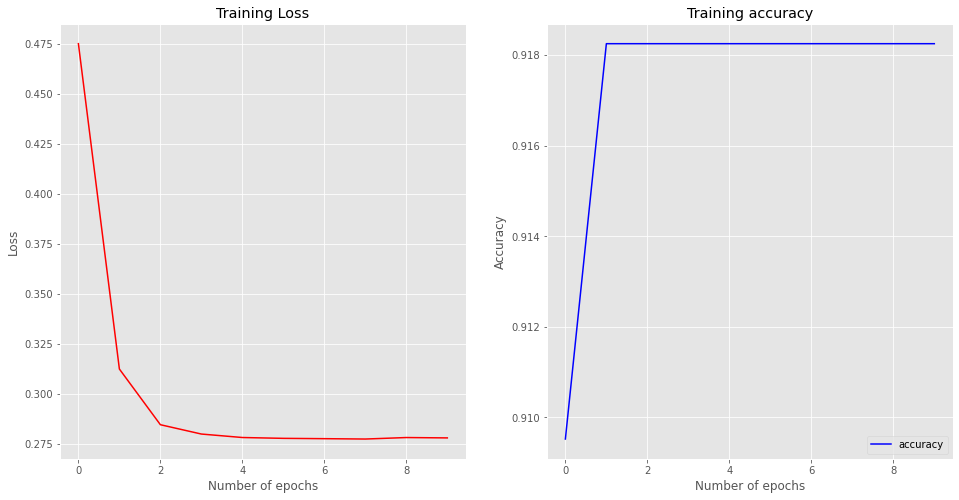

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

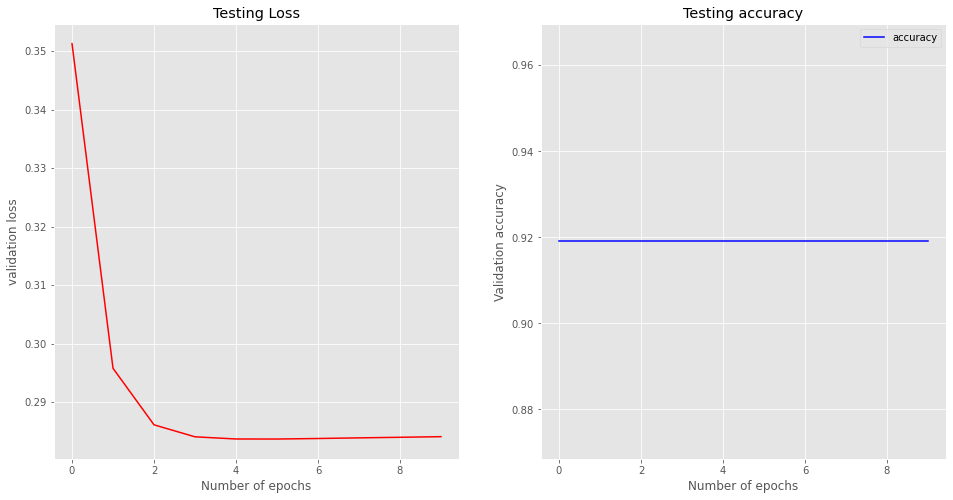

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], color='r', label='loss')
plt.title('Testing Loss')
plt.xlabel("Number of epochs")
plt.ylabel("validation loss")
plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy'], color='b', label='accuracy')
plt.title('Testing accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Validation accuracy")
plt.legend()
plt.show()

### Prediction Using Existing Data

In [ ]:
xtest=x_test[257].reshape(1,45)#reshape the size to 40 word lenght
print(xtest)#out[]:2D feature label
ylabel=y_test[257]#ylabel with that idx
ypred=model.predict(xtest)[0][0]#prediction using words  in X
  #var='sentence
  #reshape to new shape
sent=' '.join([index2word[x] for x in xtest[0].tolist() if x!=0])#to see words in idx
print(' %.5f %d %s'%(int(ypred),ylabel,sent))

[[  25   36 2149  108  499    6    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]]
1/1 [==============================] - 0s 277ms/step
 0.00000 0 really work smooth make seem like


# PREDICTION

In [ ]:
def preprocess(text):
    tokenizer = Tokenizer(num_words=5000, split=' ')
    tokenizer.fit_on_texts(text)
    X= tokenizer.texts_to_sequences(text)
    X= pad_sequences(X,padding='post',maxlen=maxlen)
    pred = model.predict(X)
    if pred >= 0.5 :
        print('This is a Positive response')
    else :
        print('This is a Negative Response')

    return pred

In [ ]:
preprocess(["didnt like "])

1/1 [==============================] - 0s 24ms/step
This is a Positive response


array([[0.92573667]], dtype=float32)